In [ ]:
pip install folium


In [ ]:
pip install plotly

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
import folium
from folium.plugins import HeatMap, HeatMapWithTime
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Cargamos los datos y addicionalmente la lista de codigos de cada pais.

In [ ]:
data_df = pd.read_csv(os.path.join("une_rt_m.tsv"), sep='\t')

In [ ]:
country_codes_df = pd.read_csv(os.path.join("wikipedia-iso-country-codes.csv"))

In [ ]:
#Comprobamos los valores datos

In [ ]:
data_df.shape

(2131, 452)

In [ ]:
data_df.head()

,"s_adj,age,unit,sex,geo\time",2020M07,2020M06,2020M05,2020M04,2020M03,2020M02,2020M01,2019M12,2019M11,2019M10,2019M09,2019M08,2019M07,2019M06,2019M05,2019M04,2019M03,2019M02,2019M01,2018M12,2018M11,2018M10,2018M09,2018M08,2018M07,2018M06,2018M05,2018M04,2018M03,2018M02,2018M01,2017M12,2017M11,2017M10,2017M09,2017M08,2017M07,2017M06,2017M05,...,1986M04,1986M03,1986M02,1986M01,1985M12,1985M11,1985M10,1985M09,1985M08,1985M07,1985M06,1985M05,1985M04,1985M03,1985M02,1985M01,1984M12,1984M11,1984M10,1984M09,1984M08,1984M07,1984M06,1984M05,1984M04,1984M03,1984M02,1984M01,1983M12,1983M11,1983M10,1983M09,1983M08,1983M07,1983M06,1983M05,1983M04,1983M03,1983M02,1983M01
0,"NSA,TOTAL,PC_ACT,F,AT",6.0,6.2,5.2,4.9,4.7,4.1,4.4,4.0,3.9,4.2,3.8,4.8,4.7,4.1,4.4,4.8,4.5,5.0,4.3,4.7,4.3,4.0,5.1,5.6,4.8,4.3,4.3,4.4,4.8,5.0,4.6,5.2,5.3,4.6,5.1,5.3,4.7,4.9,5.1,...,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:
1,"NSA,TOTAL,PC_ACT,F,BE",5.4,5.0,5.0,5.2,5.0,4.9,4.8,4.6,4.5,4.7,5.0,5.3,5.3,5.0,4.9,5.0,4.9,4.9,5.1,5.2,5.2,5.3,5.2,5.4,5.7,5.7,5.9,6.1,5.8,5.7,5.8,6.0,6.2,6.5,6.7,7.0,7.1,6.7,7.0,...,15.8,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:
2,"NSA,TOTAL,PC_ACT,F,BG",3.9,3.9,4.2,4.7,4.1,4.2,4.3,3.9,3.8,3.6,3.4,3.4,3.5,3.5,3.7,4.0,4.4,4.7,4.7,4.3,4.3,4.4,4.4,4.6,4.6,4.6,4.7,4.8,4.8,5.0,5.4,5.6,5.8,5.7,5.5,5.6,5.5,5.4,5.6,...,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:
3,"NSA,TOTAL,PC_ACT,F,CH",:,4.4,4.3,4.4,4.6,4.6,4.5,4.1,4.0,4.2,4.9,5.0,4.8,4.3,4.3,4.6,5.2,5.5,5.4,5.2,5.2,5.0,4.7,4.6,4.7,5.0,5.3,5.4,5.4,5.5,5.4,4.9,4.8,4.9,5.4,5.5,5.3,4.8,4.7,...,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:
4,"NSA,TOTAL,PC_ACT,F,CY",7.2,6.6,6.4,6.8,7.1,7.5,7.9,7.5,7.7,5.8,6.9,9.1,9.2,7.3,6.0,6.7,9.2,10.4,10.1,8.6,8.2,6.2,7.5,9.2,9.4,7.9,7.0,7.6,10.0,11.7,11.9,11.0,10.4,8.1,9.1,10.9,11.6,11.2,10.8,...,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:


In [ ]:
#Cambiamos los nombres de las columnas y comprobamos

In [ ]:
country_codes_df.head()

,English short name lower case,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2
0,Zimbabwe,ZW,ZWE,716,ISO 3166-2:ZW
1,Zambia,ZM,ZMB,894,ISO 3166-2:ZM
2,Yemen,YE,YEM,887,ISO 3166-2:YE
3,Western Sahara,EH,ESH,732,ISO 3166-2:EH
4,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF


In [ ]:
country_codes_df.columns = ['country', 'C2', 'C3', 'numeric', 'iso']

In [ ]:
country_codes_df.head()

,country,C2,C3,numeric,iso
0,Zimbabwe,ZW,ZWE,716,ISO 3166-2:ZW
1,Zambia,ZM,ZMB,894,ISO 3166-2:ZM
2,Yemen,YE,YEM,887,ISO 3166-2:YE
3,Western Sahara,EH,ESH,732,ISO 3166-2:EH
4,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF


In [ ]:
#Separamos de la primera columna los diferentes atributos y ponerlos en diferentes columnas

In [ ]:
data_df['C2'] = data_df['s_adj,age,unit,sex,geo\\time'].apply(lambda x: x.split(",")[-1])
data_df['age'] = data_df['s_adj,age,unit,sex,geo\\time'].apply(lambda x: x.split(",")[1])
data_df['unit'] = data_df['s_adj,age,unit,sex,geo\\time'].apply(lambda x: x.split(",")[2])
data_df['sex'] = data_df['s_adj,age,unit,sex,geo\\time'].apply(lambda x: x.split(",")[3])
data_df['s_adj'] = data_df['s_adj,age,unit,sex,geo\\time'].apply(lambda x: x.split(",")[0])

In [ ]:
data_df.head()

,"s_adj,age,unit,sex,geo\time",2020M07,2020M06,2020M05,2020M04,2020M03,2020M02,2020M01,2019M12,2019M11,2019M10,2019M09,2019M08,2019M07,2019M06,2019M05,2019M04,2019M03,2019M02,2019M01,2018M12,2018M11,2018M10,2018M09,2018M08,2018M07,2018M06,2018M05,2018M04,2018M03,2018M02,2018M01,2017M12,2017M11,2017M10,2017M09,2017M08,2017M07,2017M06,2017M05,...,1985M11,1985M10,1985M09,1985M08,1985M07,1985M06,1985M05,1985M04,1985M03,1985M02,1985M01,1984M12,1984M11,1984M10,1984M09,1984M08,1984M07,1984M06,1984M05,1984M04,1984M03,1984M02,1984M01,1983M12,1983M11,1983M10,1983M09,1983M08,1983M07,1983M06,1983M05,1983M04,1983M03,1983M02,1983M01,C2,age,unit,sex,s_adj
0,"NSA,TOTAL,PC_ACT,F,AT",6.0,6.2,5.2,4.9,4.7,4.1,4.4,4.0,3.9,4.2,3.8,4.8,4.7,4.1,4.4,4.8,4.5,5.0,4.3,4.7,4.3,4.0,5.1,5.6,4.8,4.3,4.3,4.4,4.8,5.0,4.6,5.2,5.3,4.6,5.1,5.3,4.7,4.9,5.1,...,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,AT,TOTAL,PC_ACT,F,NSA
1,"NSA,TOTAL,PC_ACT,F,BE",5.4,5.0,5.0,5.2,5.0,4.9,4.8,4.6,4.5,4.7,5.0,5.3,5.3,5.0,4.9,5.0,4.9,4.9,5.1,5.2,5.2,5.3,5.2,5.4,5.7,5.7,5.9,6.1,5.8,5.7,5.8,6.0,6.2,6.5,6.7,7.0,7.1,6.7,7.0,...,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,BE,TOTAL,PC_ACT,F,NSA
2,"NSA,TOTAL,PC_ACT,F,BG",3.9,3.9,4.2,4.7,4.1,4.2,4.3,3.9,3.8,3.6,3.4,3.4,3.5,3.5,3.7,4.0,4.4,4.7,4.7,4.3,4.3,4.4,4.4,4.6,4.6,4.6,4.7,4.8,4.8,5.0,5.4,5.6,5.8,5.7,5.5,5.6,5.5,5.4,5.6,...,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,BG,TOTAL,PC_ACT,F,NSA
3,"NSA,TOTAL,PC_ACT,F,CH",:,4.4,4.3,4.4,4.6,4.6,4.5,4.1,4.0,4.2,4.9,5.0,4.8,4.3,4.3,4.6,5.2,5.5,5.4,5.2,5.2,5.0,4.7,4.6,4.7,5.0,5.3,5.4,5.4,5.5,5.4,4.9,4.8,4.9,5.4,5.5,5.3,4.8,4.7,...,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,CH,TOTAL,PC_ACT,F,NSA
4,"NSA,TOTAL,PC_ACT,F,CY",7.2,6.6,6.4,6.8,7.1,7.5,7.9,7.5,7.7,5.8,6.9,9.1,9.2,7.3,6.0,6.7,9.2,10.4,10.1,8.6,8.2,6.2,7.5,9.2,9.4,7.9,7.0,7.6,10.0,11.7,11.9,11.0,10.4,8.1,9.1,10.9,11.6,11.2,10.8,...,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,CY,TOTAL,PC_ACT,F,NSA


In [ ]:
#Comprobamos que la division se hay realizado correctamente revisando la lista de paises

In [ ]:
print(f"countries:\n{list(data_df.C2.unique())}")

countries:
['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EA', 'EA18', 'EA19', 'EE', 'EL', 'ES', 'EU25', 'EU27_2007', 'EU27_2020', 'EU28', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'JP', 'LT', 'LU', 'LV', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK', 'UK', 'US', 'TR']


In [ ]:
#Vamos a elegir el intervalo de tiempo entre 2010 y 2020

In [ ]:
selected_cols = ['C2','age','unit','sex', 's_adj', 
                 '2020M07 ', '2020M06 ', '2020M05 ', '2020M04 ','2020M03 ','2020M02 ','2020M01 ',
                 
                 '2019M12 ','2019M11 ','2019M10 ','2019M09 ','2019M08 ','2019M07 ',
                 '2019M06 ','2019M05 ','2019M04 ','2019M03 ','2019M02 ','2019M01 ',
                
                 '2018M12 ','2018M11 ','2018M10 ','2018M09 ','2018M08 ','2018M07 ',
                 '2018M06 ','2018M05 ','2018M04 ','2018M03 ','2018M02 ','2018M01 ',
                
                 '2017M12 ','2017M11 ','2017M10 ','2017M09 ','2017M08 ','2017M07 ',
                 '2017M06 ','2017M05 ','2017M04 ','2017M03 ','2017M02 ','2017M01 ',
                
                 '2016M12 ','2016M11 ','2016M10 ','2016M09 ','2016M08 ','2016M07 ',
                 '2016M06 ','2016M05 ','2016M04 ','2016M03 ','2016M02 ','2016M01 ',
                
                 '2015M12 ','2015M11 ','2015M10 ','2015M09 ','2015M08 ','2015M07 ',
                 '2015M06 ','2015M05 ','2015M04 ','2015M03 ','2015M02 ','2015M01 ', 
                 
                '2014M12 ','2014M11 ','2014M10 ','2014M09 ','2014M08 ',
                '2014M07 ', '2014M06 ', '2014M05 ', '2014M04 ','2014M03 ','2014M02 ','2014M01 ',


                 '2013M12 ','2019M11 ','2019M10 ','2019M09 ','2019M08 ','2019M07 ',
                 '2013M06 ','2013M05 ','2013M04 ','2013M03 ','2013M02 ','2013M01 ',
                
                 '2012M12 ','2012M11 ','2012M10 ','2012M09 ','2012M08 ','2012M07 ',
                '2012M06 ','2012M05 ','2012M04 ','2012M03 ','2012M02 ','2012M01 ',
                
                 '2011M12 ','2011M11 ','2011M10 ','2011M09 ','2011M08 ','2011M07 ',
                 '2011M06 ','2011M05 ','2011M04 ','2011M03 ','2011M02 ','2011M01 ',
                
                 '2010M12 ','2010M11 ','2010M10 ','2010M09 ','2010M08 ','2010M07 ',
                 '2010M06 ','2010M05 ','2010M04 ','2010M03 ','2010M02 ','2010M01 ',]

In [ ]:
data_sel_df = data_df[selected_cols]
data_sel_df.head()

,C2,age,unit,sex,s_adj,2020M07,2020M06,2020M05,2020M04,2020M03,2020M02,2020M01,2019M12,2019M11,2019M10,2019M09,2019M08,2019M07,2019M06,2019M05,2019M04,2019M03,2019M02,2019M01,2018M12,2018M11,2018M10,2018M09,2018M08,2018M07,2018M06,2018M05,2018M04,2018M03,2018M02,2018M01,2017M12,2017M11,2017M10,2017M09,...,2013M04,2013M03,2013M02,2013M01,2012M12,2012M11,2012M10,2012M09,2012M08,2012M07,2012M06,2012M05,2012M04,2012M03,2012M02,2012M01,2011M12,2011M11,2011M10,2011M09,2011M08,2011M07,2011M06,2011M05,2011M04,2011M03,2011M02,2011M01,2010M12,2010M11,2010M10,2010M09,2010M08,2010M07,2010M06,2010M05,2010M04,2010M03,2010M02,2010M01
0,AT,TOTAL,PC_ACT,F,NSA,6.0,6.2,5.2,4.9,4.7,4.1,4.4,4.0,3.9,4.2,3.8,4.8,4.7,4.1,4.4,4.8,4.5,5.0,4.3,4.7,4.3,4.0,5.1,5.6,4.8,4.3,4.3,4.4,4.8,5.0,4.6,5.2,5.3,4.6,5.1,...,4.8,5.6,5.2,5.3,4.6,4.7,4.6,5.0,5.2,4.9,5.0,4.1,4.5,5.0,5.4,4.5,5.0,5.5,5.1,4.1,4.1,4.1,4.3,4.2,4.1,4.7,5.6,4.4,4.3,4.3,5.1,4.7,4.6,4.7,4.5,4.5,5.0,4.5,4.9,4.5
1,BE,TOTAL,PC_ACT,F,NSA,5.4,5.0,5.0,5.2,5.0,4.9,4.8,4.6,4.5,4.7,5.0,5.3,5.3,5.0,4.9,5.0,4.9,4.9,5.1,5.2,5.2,5.3,5.2,5.4,5.7,5.7,5.9,6.1,5.8,5.7,5.8,6.0,6.2,6.5,6.7,...,8.1,8.1,8.1,8.0,7.6,7.4,7.5,7.6,8.0,7.8,7.2,7.1,7.2,7.2,7.2,7.2,7.0,7.1,7.3,7.8,8.3,7.9,6.9,6.6,6.6,6.6,6.8,7.2,7.7,8.0,8.4,8.8,9.2,9.0,8.1,8.0,8.3,8.7,9.0,9.1
2,BG,TOTAL,PC_ACT,F,NSA,3.9,3.9,4.2,4.7,4.1,4.2,4.3,3.9,3.8,3.6,3.4,3.4,3.5,3.5,3.7,4.0,4.4,4.7,4.7,4.3,4.3,4.4,4.4,4.6,4.6,4.6,4.7,4.8,4.8,5.0,5.4,5.6,5.8,5.7,5.5,...,12.2,12.3,12.2,12.1,11.7,11.6,11.0,10.2,10.1,10.2,10.4,10.7,11.2,11.2,11.1,10.9,10.4,10.1,9.6,9.3,9.3,9.5,9.7,10.1,10.6,10.7,11.0,11.1,10.9 d,10.6,9.9,9.2,8.9,8.9,9.1,9.5,9.8,9.6,9.6,9.3
3,CH,TOTAL,PC_ACT,F,NSA,:,4.4,4.3,4.4,4.6,4.6,4.5,4.1,4.0,4.2,4.9,5.0,4.8,4.3,4.3,4.6,5.2,5.5,5.4,5.2,5.2,5.0,4.7,4.6,4.7,5.0,5.3,5.4,5.4,5.5,5.4,4.9,4.8,4.9,5.4,...,4.9,5.1,5.3,5.2,5.0,4.9,4.8,4.9,4.9,4.7,4.5,4.5,4.6,4.6,4.7,4.7,4.8,4.8,4.9,5.5,5.6,5.1,4.1,3.8,4.1,4.8,5.1,5.0,4.6,4.5,4.8,5.5,5.8,5.6,5.1,5.0,5.2,5.4,5.4,5.5
4,CY,TOTAL,PC_ACT,F,NSA,7.2,6.6,6.4,6.8,7.1,7.5,7.9,7.5,7.7,5.8,6.9,9.1,9.2,7.3,6.0,6.7,9.2,10.4,10.1,8.6,8.2,6.2,7.5,9.2,9.4,7.9,7.0,7.6,10.0,11.7,11.9,11.0,10.4,8.1,9.1,...,14.5,15.0,15.8,15.5,13.1,12.5,10.9,11.1,11.7,12.6,11.0,10.3,9.9,10.1,9.9,9.6,8.4,8.4,7.4,7.6,8.1,8.1,7.4,6.7,6.9,7.4,7.9,7.5,6.3,6.0,4.9,5.0,5.9,6.6,7.1,6.5,6.7,7.6,7.3,7.2


In [ ]:
#Vamos a unir las columnas de codigos

In [ ]:
data_sel_df = data_sel_df.merge(country_codes_df, on="C2")
data_sel_df.head()

,C2,age,unit,sex,s_adj,2020M07,2020M06,2020M05,2020M04,2020M03,2020M02,2020M01,2019M12,2019M11,2019M10,2019M09,2019M08,2019M07,2019M06,2019M05,2019M04,2019M03,2019M02,2019M01,2018M12,2018M11,2018M10,2018M09,2018M08,2018M07,2018M06,2018M05,2018M04,2018M03,2018M02,2018M01,2017M12,2017M11,2017M10,2017M09,...,2012M12,2012M11,2012M10,2012M09,2012M08,2012M07,2012M06,2012M05,2012M04,2012M03,2012M02,2012M01,2011M12,2011M11,2011M10,2011M09,2011M08,2011M07,2011M06,2011M05,2011M04,2011M03,2011M02,2011M01,2010M12,2010M11,2010M10,2010M09,2010M08,2010M07,2010M06,2010M05,2010M04,2010M03,2010M02,2010M01,country,C3,numeric,iso
0,AT,TOTAL,PC_ACT,F,NSA,6.0,6.2,5.2,4.9,4.7,4.1,4.4,4.0,3.9,4.2,3.8,4.8,4.7,4.1,4.4,4.8,4.5,5.0,4.3,4.7,4.3,4.0,5.1,5.6,4.8,4.3,4.3,4.4,4.8,5.0,4.6,5.2,5.3,4.6,5.1,...,4.6,4.7,4.6,5.0,5.2,4.9,5.0,4.1,4.5,5.0,5.4,4.5,5.0,5.5,5.1,4.1,4.1,4.1,4.3,4.2,4.1,4.7,5.6,4.4,4.3,4.3,5.1,4.7,4.6,4.7,4.5,4.5,5.0,4.5,4.9,4.5,Austria,AUT,40,ISO 3166-2:AT
1,AT,TOTAL,PC_ACT,M,NSA,5.5,6.2,6.1,5.2,5.0,5.5,4.2,4.6,3.7,4.5,4.6,4.5,4.4,4.2,4.6,4.7,5.2,5.3,5.2,5.0,4.2,5.5,4.8,4.3,5.2,4.8,4.2,5.5,5.3,5.5,6.3,5.5,5.7,5.3,5.8,...,5.1,5.4,4.7,5.2,5.1,5.1,4.9,5.4,4.9,4.4,5.4,3.9,4.4,4.6,4.3,3.9,3.8,4.2,3.9,4.8,5.3,4.8,5.9,4.9,4.4,4.4,4.0,4.8,4.7,5.0,5.0,4.9,5.5,6.2,6.0,5.2,Austria,AUT,40,ISO 3166-2:AT
2,AT,TOTAL,PC_ACT,T,NSA,5.7,6.2,5.7,5.1,4.9,4.9,4.3,4.3,3.8,4.4,4.2,4.6,4.5,4.1,4.5,4.8,4.9,5.2,4.8,4.8,4.3,4.8,4.9,4.9,5.0,4.6,4.2,5.0,5.0,5.3,5.5,5.3,5.5,5.0,5.4,...,4.9,5.1,4.7,5.1,5.1,5.0,4.9,4.8,4.7,4.7,5.4,4.2,4.7,5.0,4.7,4.0,3.9,4.1,4.1,4.5,4.7,4.7,5.8,4.7,4.4,4.4,4.5,4.8,4.7,4.8,4.7,4.8,5.2,5.4,5.5,4.9,Austria,AUT,40,ISO 3166-2:AT
3,AT,TOTAL,THS_PER,F,NSA,129,132,108,100,97,88,94,86,82,90,80,103,100,86,92,102,95,107,90,99,92,86,108,119,104,91,90,93,100,106,96,110,111,98,107,...,93,94,92,102,104,99,101,81,90,100,108,89,97,110,102,82,80,82,84,82,81,93,110,86,83,85,101,93,91,92,76,93,104,76,100,93,Austria,AUT,40,ISO 3166-2:AT
4,AT,TOTAL,THS_PER,M,NSA,134,149,144,121,118,133,98,112,89,111,112,110,107,102,111,113,125,126,124,119,102,135,116,104,126,117,101,133,125,130,147,130,137,128,139,...,116,123,109,120,119,117,112,124,111,97,119,85,100,104,96,91,85,97,89,109,119,107,131,108,99,99,91,111,109,113,95,118,133,120,142,122,Austria,AUT,40,ISO 3166-2:AT


In [ ]:
print(f"selected data shape: {data_sel_df.shape}")

selected data shape: (1645, 136)


In [ ]:
#La parte más importante, vamos a usar merge para convertir todos los meses en columnas

In [ ]:
data_tr_df = data_sel_df.melt(id_vars=["country", "age", "unit", "sex", "s_adj", "C2", "C3", "numeric", "iso"], 
        var_name="Date", 
        value_name="Value")

In [ ]:
data_tr_df.head()

,country,age,unit,sex,s_adj,C2,C3,numeric,iso,Date,Value
0,Austria,TOTAL,PC_ACT,F,NSA,AT,AUT,40,ISO 3166-2:AT,2020M07,6.0
1,Austria,TOTAL,PC_ACT,M,NSA,AT,AUT,40,ISO 3166-2:AT,2020M07,5.5
2,Austria,TOTAL,PC_ACT,T,NSA,AT,AUT,40,ISO 3166-2:AT,2020M07,5.7
3,Austria,TOTAL,THS_PER,F,NSA,AT,AUT,40,ISO 3166-2:AT,2020M07,129
4,Austria,TOTAL,THS_PER,M,NSA,AT,AUT,40,ISO 3166-2:AT,2020M07,134


In [ ]:
#Ahora hay que limpiar la columna values de todo lo que no sean digitos

In [ ]:
import re
data_tr_df['Value'] = data_tr_df['Value'].apply(lambda x: re.sub(r"[a-zA-Z: ]", "", x))
data_tr_df['Value'] = data_tr_df['Value'].apply(lambda x: x.replace(" ",""))

data_tr_df = data_tr_df.loc[~(data_tr_df.Value=="")]

data_tr_df['Value'] = data_tr_df['Value'].apply(lambda x: float(x))

In [ ]:
#Veamos cuantos valores tenemos

In [ ]:
print(f"distinct values: {len(list(data_tr_df['Value'].unique()))}")
print(f"samples values: {data_tr_df['Value'].unique()}")

distinct values: 5216
samples values: [6.0000e+00 5.5000e+00 5.7000e+00 ... 8.9410e+03 1.4987e+04 1.1059e+04]


In [ ]:
#Realizamos un filtrado para seleccionar solo los datos que conciernen al porcentage de población activa (PC_ACT)
# y ambos sexos entre 35 y 74 años 

In [ ]:
total_y25_74_df = data_tr_df.loc[(data_tr_df.age=='Y25-74')&(data_tr_df.unit=='PC_ACT')&(data_tr_df.sex=='T')&(data_tr_df.s_adj=='TC')]

In [ ]:
#Definimos la funcion de gráfica 

In [ ]:
def plot_time_variation(df, y='Value', size=1, is_log=False, title=""):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))

    countries = list(df.country.unique())
    for country in countries:
        df_ = df[(df['country']==country)] 
        g = sns.lineplot(x="Date", y=y, data=df_,  label=country)  
        ax.text(max(df_['Date']), (df_.loc[df_['Date']==max(df_['Date']), y]), str(country))
    plt.xticks(rotation=90)
    plt.title(f'Total desempleados, {title}, ordenados por pais')
    ax.text(max(df_['Date']), (df_.loc[df_['Date']==max(df_['Date']), y]), str(country))
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()  

In [ ]:
#Mostramos las graficas

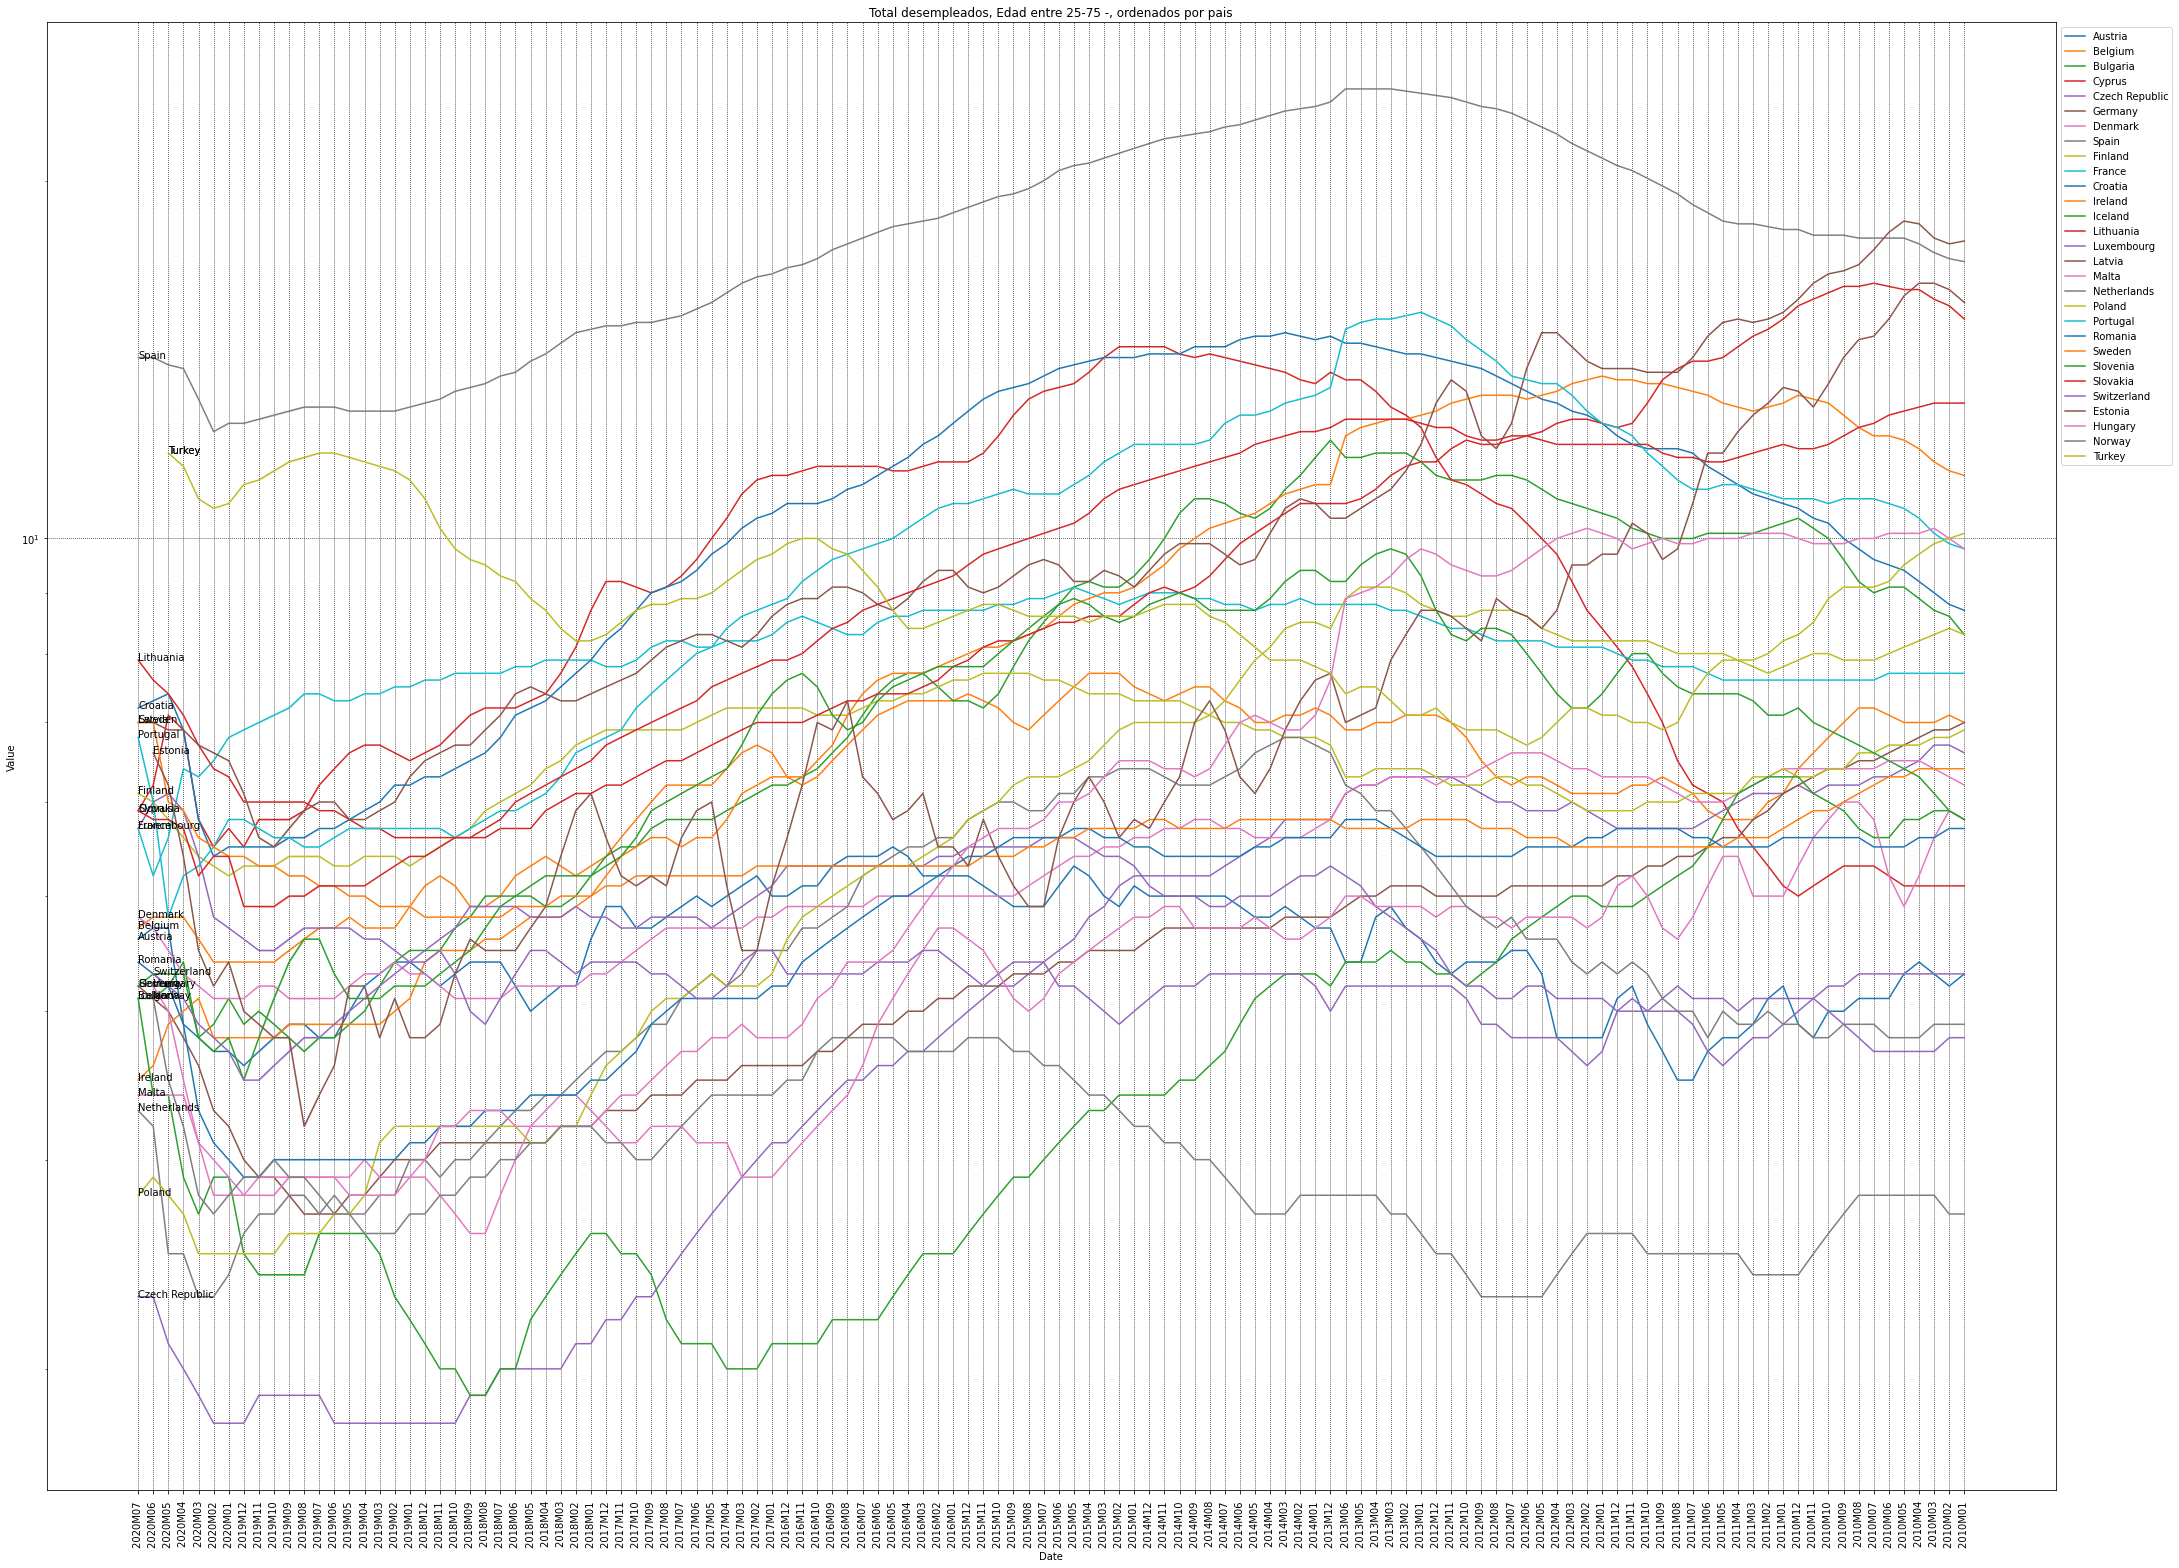

In [ ]:
plot_time_variation(total_y25_74_df, size=9, is_log=True, title = "Edad entre 25-75 -")

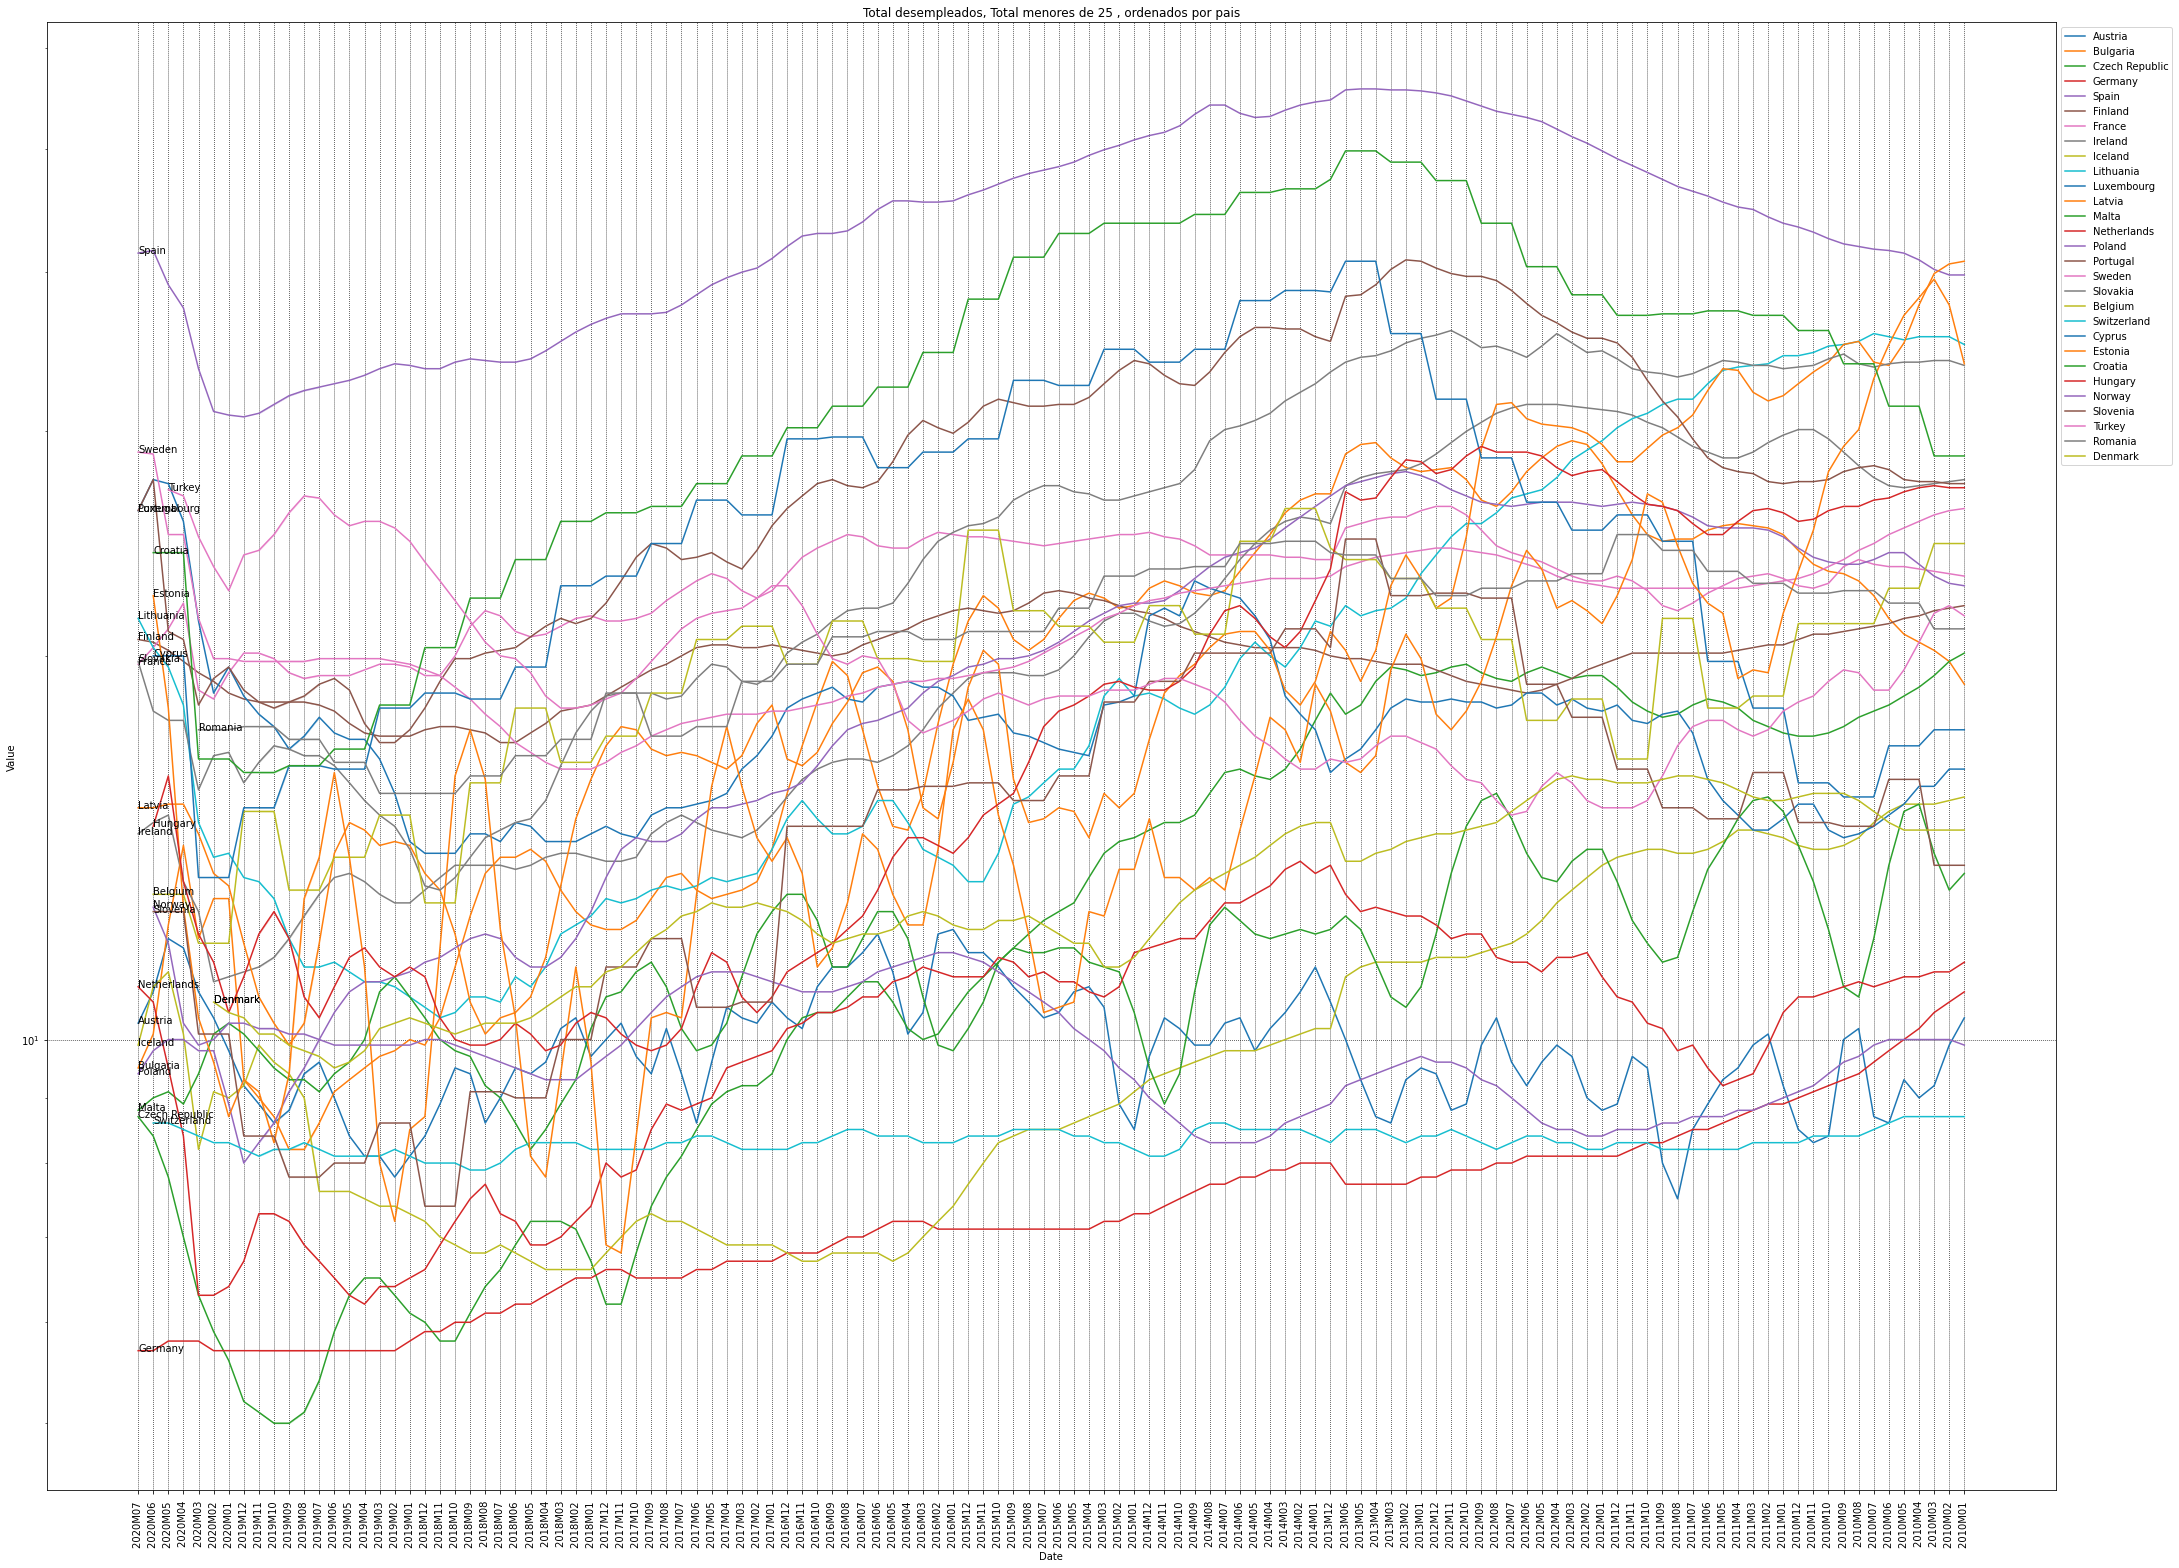

In [ ]:
total_Y_LT25_df = data_tr_df.loc[(data_tr_df.age=='Y_LT25')&(data_tr_df.unit=='PC_ACT')&(data_tr_df.sex=='T')&(data_tr_df.s_adj=='TC')]
plot_time_variation(total_Y_LT25_df, size=9, is_log=True, title = "Total menores de 25 ")

In [ ]:
#Graficas para comparar grupos de edad, sexo segun el pais.

In [ ]:
def plot_time_variation_age_sex(data_tr_df, y='Value', country="Netherlands"):
    c_df = data_tr_df.loc[(data_tr_df.country==country)&(data_tr_df.unit=='PC_ACT')&(data_tr_df.s_adj=='TC')]
    f, ax = plt.subplots(1,1, figsize=(16,12))
    sns.lineplot(x="Date", y=y, data=c_df.loc[(c_df.age=='Y_LT25')&(c_df.sex=='F')],  label="Mujeres <25 años")  
    sns.lineplot(x="Date", y=y, data=c_df.loc[(c_df.age=='Y_LT25')&(c_df.sex=='M')],  label="Hombres <25 años")  
    sns.lineplot(x="Date", y=y, data=c_df.loc[(c_df.age=='Y25-74')&(c_df.sex=='F')],  label="Mujeres, 25-74 años")  
    sns.lineplot(x="Date", y=y, data=c_df.loc[(c_df.age=='Y25-74')&(c_df.sex=='M')],  label="Hombres, 25-74 años")  

    plt.xticks(rotation=90)
    plt.title(f'Total unemployment in {country}, grouped by age & sex')
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()  

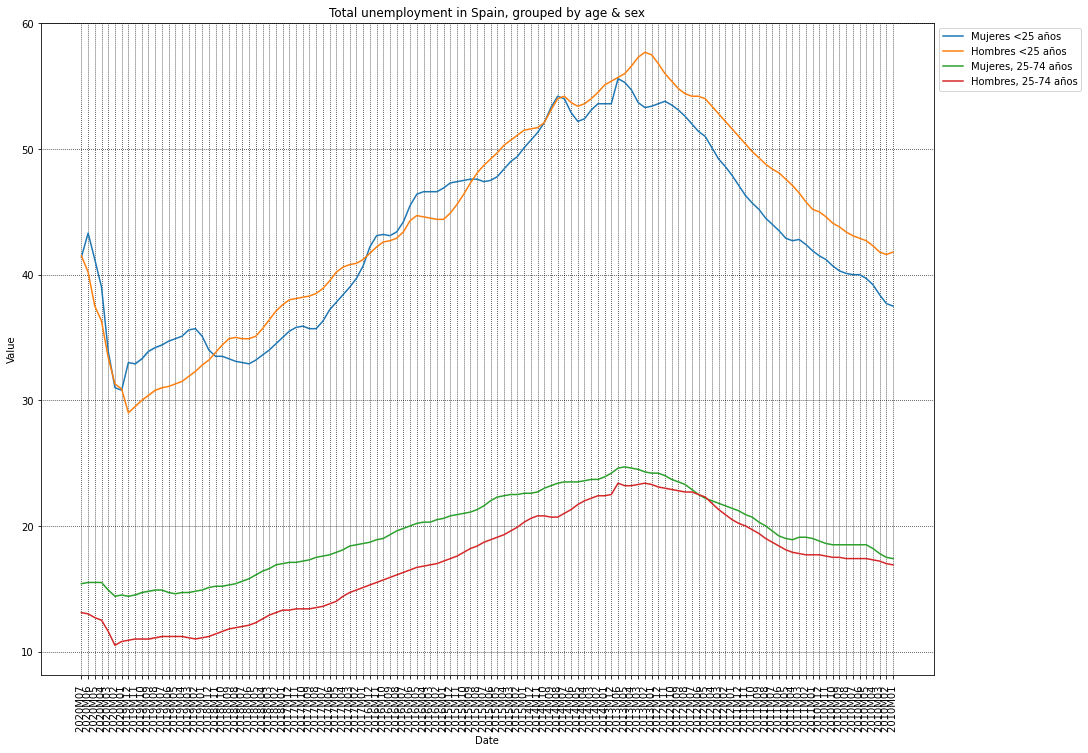

In [ ]:
plot_time_variation_age_sex(data_tr_df,country="Spain")

In [ ]:
#Definimos la función de mapas gráficos de europa

In [ ]:
import plotly.express as px

def plot_animated_map(dd_df, title):
    hover_text = []
    for index, row in dd_df.iterrows():
        hover_text.append((f"country: {row['country']}<br>unemployment: {row['Value']}%<br>country code: {row['iso']}"))
    dd_df['hover_text'] = hover_text

    fig = px.choropleth(dd_df, 
                        locations="C3",
                        hover_name='hover_text',
                        color="Value",
                        animation_frame="Date",
                        projection="natural earth",
                        color_continuous_scale=px.colors.sequential.Plasma,
                        width=600, height=600)
    fig.update_geos(   
        showcoastlines=True, coastlinecolor="DarkBlue",
        showland=True, landcolor="LightGrey",
        showocean=True, oceancolor="LightBlue",
        showlakes=True, lakecolor="Blue",
        showrivers=True, rivercolor="Blue",
        showcountries=True, countrycolor="DarkBlue"
    )
    fig.update_layout(title = title, geo_scope="europe")
    fig.show()    

In [ ]:
c_df = data_tr_df.loc[(data_tr_df.unit=='PC_ACT')&(data_tr_df.s_adj=='TC')]
dd_df=c_df.loc[(c_df.age=='Y25-74')&(c_df.sex=='T')]
dd_df = dd_df.sort_values(by='Date')
title = 'Porcentaje de desempleados por pais <br> Total entre 25-74 años'
plot_animated_map(dd_df, title)

In [ ]:
c_df = data_tr_df.loc[(data_tr_df.unit=='PC_ACT')&(data_tr_df.s_adj=='TC')]
dd_df=c_df.loc[(c_df.age=='Y_LT25')&(c_df.sex=='T')]
dd_df = dd_df.sort_values(by='Date')
title = 'Porcentaje de desempleados por pais <br>Total menores de 25 años'
plot_animated_map(dd_df, title)